# function to find words

In [1]:
def find_word(N,test_str):  
    count = 0
    res = "" 
    for ele in test_str: 
        if ele == '\t': 
            count = count + 1
            if count == N: 
                break
            res = "" 
        else : 
            res = res + ele 

    return(res)

# Save data to files

In [2]:
def save_values(path, data):
    with open('C:\\Users\\aravi\\Desktop\\igv-jupyter-master\\igv-jupyter-master\\examples\\data\\'+path+'.bed', 'w') as f:
        for key in data.keys():
            for row in data[key]:
                f.write('%s\t%s\t%s\n' % (key, row[0], row[1]))

# Find index for counting hits

In [3]:
def find_index(lst, val):
    
    start = 0
    end = len(lst) - 1
    ret = 0
    while (start <= end):
        mid = int((start + end) / 2)
        
        if lst[mid][0] < val:
            ret = mid
            start = mid + 1
        elif lst[mid][0] > val:
            end = mid - 1
        else:
            ret = mid
            return ret
    return ret
            

In [55]:
# Importing the packages
import matplotlib.pyplot as plt

#Declaring the Variables

start = {}
end = {}
c_length = {}
cpg_islands = {}
shores = {}
shelves = {}
seas = {}
dna_methylation = {}
bed_value = 2000
auto = ["chr1", "chr2", "chr3", "chr4", "chr5", "chr6", "chr7", "chr8", "chr9", "chr10", "chr11",
        "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", "chr20", "chr21", "chr22"]


for c in auto:
    start[c] = []
    end[c] = []

    
# Reading the Data from the files

with open("C:/Users/aravi/Desktop/igv-jupyter-master/igv-jupyter-master/examples/data/hg19.chrom.sizes.txt") as file:
    string = file.read()
    for line in string.split('\n'):
        if find_word(1, line) in auto:
            c_length[find_word(1, line)] = int(find_word(2, line))
            

with open("C:/Users/aravi/Desktop/igv-jupyter-master/igv-jupyter-master/examples/data/cpgIslandExt.txt") as file:
    string = file.read()
    for line in string.split('\n'):
        if find_word(2, line) in auto:
            start[find_word(2, line)].append(int(find_word(3, line)))
            end[find_word(2, line)].append(int(find_word(4, line)))
            

with open("C:/Users/aravi/Desktop/igv-jupyter-master/igv-jupyter-master/examples/data/HAIB.A549.EtOH.Rep.3.bed")as f:
    for line in f:
        content = line.strip().split()
        if content[0] in auto:

            if content[0] in dna_methylation:
                dna_methylation[content[0]].append(
                    (int(content[1]) + int(content[2])) / 2)
            else:
                dna_methylation[content[0]] = [
                    (int(content[1]) + int(content[2])) / 2]

    for chromo in auto:
        chromo_len = c_length[chromo]
        length = len(start[chromo])

        # defining
        shores[chromo] = []
        shelves[chromo] = []
        seas[chromo] = []
        cpg_islands[chromo] = []
        
        # first cpg island value
        cpg_islands[chromo].append((start[chromo][0], end[chromo][0]))
        
        if start[chromo][0] > (2*bed_value):  # space for shore, shelve and sea
            # print(cpg_start[0])
            seas[chromo].append((0, start[chromo][0] - 2*bed_value))
            shelves[chromo].append(
                (start[chromo][0] - 2*bed_value, start[chromo][0] - bed_value))
            shores[chromo].append(
                (start[chromo][0] - bed_value, start[chromo][0]))
            
        elif start[chromo][0] > (bed_value):    # space for shore and shelve
            
            shelves[chromo].append((0, start[chromo][0] - bed_value))
            shores[chromo].append(
                (start[chromo][0] - bed_value, start[chromo][0]))
            
        elif cpg_start[0] < (bed_value):    # space for shore only
            
            shores[chromo].append((0, start[chromo][0]))

        last_end = end[chromo][0]
        for i in range(1, length):
            first = start[chromo][i]
            last = end[chromo][i]

            # space for shores, shelves and seas
            if first - last_end > (4*bed_value):
                shores[chromo].append((last_end, last_end + bed_value))
                shelves[chromo].append(
                    (last_end + bed_value, last_end + 2*bed_value))
                seas[chromo].append(
                    (last_end + 2*bed_value, first - 2*bed_value))
                shelves[chromo].append(
                    (first - 2*bed_value, first - bed_value))
                shores[chromo].append((first - bed_value, first))
                
            # space for shores and shelves
            elif first - last_end > (2*bed_value):
                shores[chromo].append((last_end, last_end + bed_value))
                shelves[chromo].append(
                    (last_end + bed_value, first - bed_value))
                shores[chromo].append((first - bed_value, first))
                
            else:  # space for shore only
                shores[chromo].append((last_end, first))

            last_end = last
            cpg_islands[chromo].append((first, last))



            # Last CPG Island
        if chromo_len - last_end > (2*bed_value):
            shores[chromo].append((last_end, last_end + bed_value))
            shelves[chromo].append(
                (last_end + bed_value, last_end + 2*bed_value))
            seas[chromo].append((last_end + 2*bed_value, chromo_len))
            
        elif chromo_len - last_end > (bed_value):
            shores[chromo].append((last_end, last_end + bed_value))
            shelves[chromo].append((last_end + bed_value, chromo_len))
            
        elif chromo_len - last_end <= (bed_value):
            shores[chromo].append((last_end, chromo_len))

    file.close()
save_values('cpg_islands', cpg_islands)
save_values('shores', shores)
save_values('shelves', shelves)
save_values('seas', seas)


cpg_islands_cnt = 0
shores_cnt = 0
shelves_cnt = 0
seas_cnt = 0


for chromo in dna_methylation.keys():

    # search the first segment which contains the methylation point
    for middle in dna_methylation[chromo]:

        shore_idx = find_index(shores[chromo], middle)
        shores_cnt = shores_cnt + \
            int(shores[chromo][shore_idx][0] <=
                middle and shores[chromo][shore_idx][1] >= middle)

        shelve_idx = find_index(shelves[chromo], middle)
        shelves_cnt = shelves_cnt + \
            int(shelves[chromo][shelve_idx][0] <=
                middle and shelves[chromo][shelve_idx][1] >= middle)

        cpg_island_idx = find_index(cpg_islands[chromo], middle)
        cpg_islands_cnt = cpg_islands_cnt + \
            int(cpg_islands[chromo][cpg_island_idx][0] <=
                middle and cpg_islands[chromo][cpg_island_idx][1] >= middle)

        sea_idx = find_index(seas[chromo], middle)
        seas_cnt = seas_cnt + \
            int(seas[chromo][sea_idx][0] <=
                middle and seas[chromo][sea_idx][1] >= middle)


vector = (cpg_islands_cnt, shores_cnt, shelves_cnt, seas_cnt)
print(vector)
norm = [float(i)/sum(vector) for i in vector]


(132325, 123011, 45488, 170407)


# Displaying the results

In [5]:
import igv


In [6]:
b = igv.Browser(
    {"reference": {
        "id": "hg19",
        "tracks": [
            {
                "name": "RefGene",
                "url": "files/data/cpg_islands.bed"
            }
        ]
    }}
)
b.show()

In [7]:
b.load_track(
    {
        "name": "cpg",
        "url": "files/data/cpg_islands.bed",
        "format": "bed",
        "type": "variant",
        "indexed": False
    })
b.load_track(
    {
    
        "name": "Shores",
        "url": "files/data/shores.bed",
        "format": "bed",
        "type": "variant",
        "indexed": False
       
    })
b.load_track(
    {
        "name": "Shelves",
        "url": "files/data/shelves.bed",
        "format": "bed",
        "type": "variant",
        "indexed": False
    })
b.load_track(
    {
        "name": "Seas",
        "url": "files/data/seas.bed",
        "format": "bed",
        "type": "variant",
        "indexed": False
    })
b.zoom_in()

In [8]:
b.zoom_in()

# Plotting in Graph

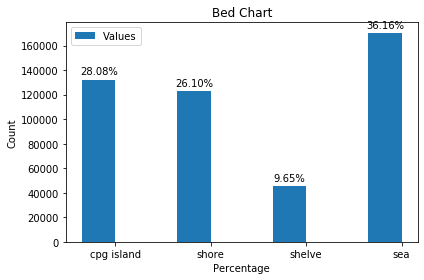

In [73]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['cpg island','shore','shelve','sea']
men_means = [ vector[0], vector[1], vector[2],vector[3]]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Values')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Percentage')
ax.set_title('Bed Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects,norm):
    i=0

    for rect in rects:
        
        height = rect.get_height()
        ax.annotate(format(norm[i],".2%"),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        i=i+1


autolabel(rects1,norm)


fig.tight_layout()

plt.show()

4
